# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 6 - Estandarización**
---

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import seaborn as sns
import matplotlib.pyplot as plt

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv

# Configuración de warnings
# ==========================
import warnings
warnings.filterwarnings('ignore')

# Estandarización
# ===============
from sklearn.preprocessing import RobustScaler

# Establecer preferencias de visualización
# ========================================
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


In [2]:
df = pd.read_csv('datos/soci_econ_country_profiles_normalizado.csv', index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal
country,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8,4.246653
Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2,4.749998


Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [3]:
# obtenemos las variables numéricas eliminando las dos de la variable respuesta (normalizada y sin normalizar)
df_numericas = df.select_dtypes(include= np.number).drop(['restaurant_price_index', 'restaurant_price_index_normal'], axis=1)
df_numericas.sample()

,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,
United Arab Emirates,9400.0,3.5,21.1,75.4,-99.0,139.27,116.77,79.34,67.98,113.302921,0.659,1.966826,86.248,13.9,2.4,88.4


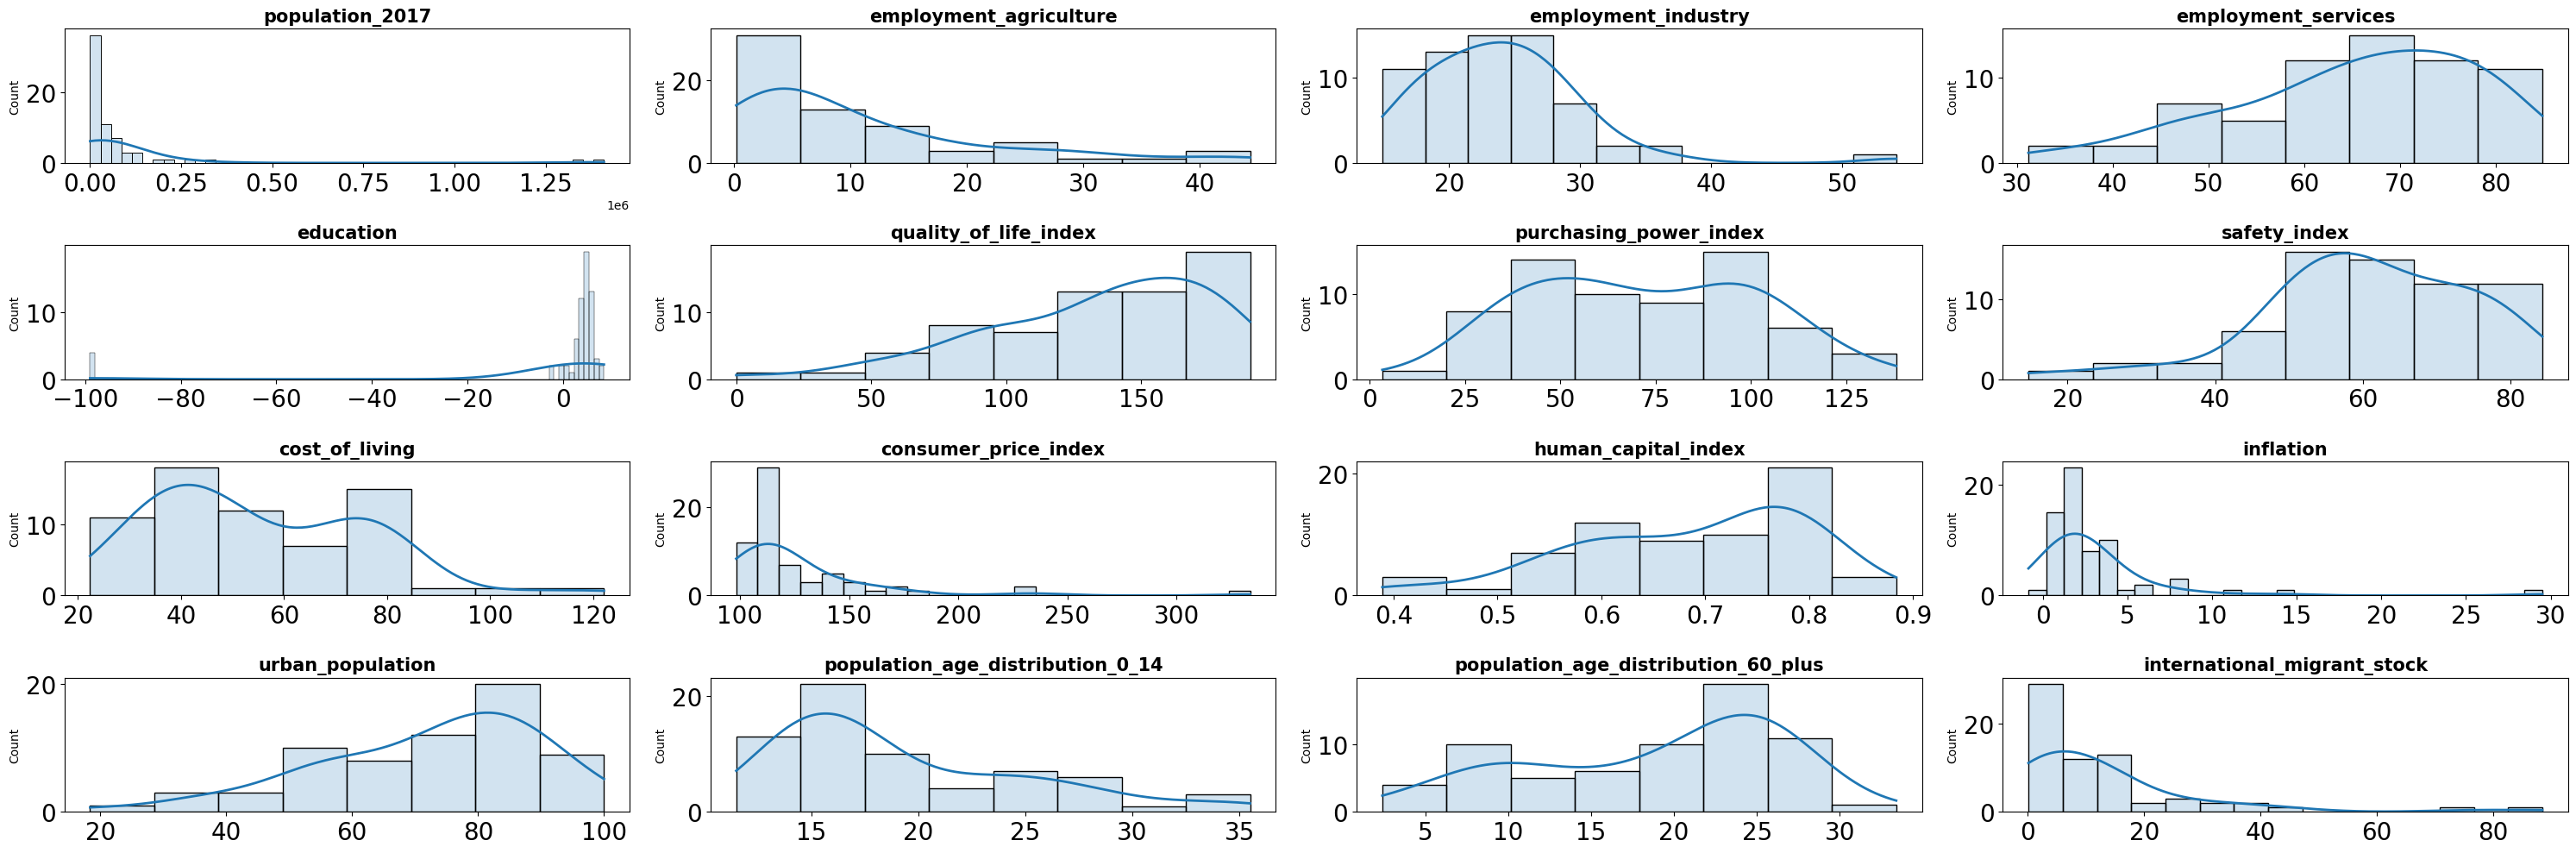

In [4]:
# vamos a sacar los histogramas de las predictoras numéricas para poder compararlos después de la estandarización
fig, axes = plt.subplots(4,4 , figsize = (30, 10))

columnas_num = df_numericas.columns
axes = axes.flat

for i, colum in enumerate(columnas_num): 
    sns.histplot(
        data = df_numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

Realizamos la estandarización con el RobustScaler porque tenemos outliers que hemos decidido mantener.

In [5]:
# construimos el modelo de escalador
robust = RobustScaler()

In [6]:
# ajustamos el modelo con nuestro set de datos
robust.fit(df_numericas)

RobustScaler()

In [7]:
# transformamos los datos
X_robust = robust.transform(df_numericas)

In [8]:
# convertimos el array resultado en un dataframe, usando la lista de paises como índice para que encaje con el dataframe original. 
numericas_robust = pd.DataFrame(X_robust, columns = df_numericas.columns, index=spv.paises_indice)
numericas_robust.sample()

,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
Russian Federation,2.130605,0.066253,0.451389,-0.086083,-0.4,-0.855646,-0.45371,-0.340579,-0.225407,2.703407,0.127596,0.763942,-0.027789,0.075802,-0.007547,-0.047337


In [15]:
# creamos un dataframe con los estadísticos de cada columna
list_medias = []
list_std = []
list_indice = []

for columna in numericas_robust.columns:
    list_medias.append(numericas_robust[columna].mean())
    list_std.append(numericas_robust[columna].std())
    list_indice.append(columna)

df_estad = pd.DataFrame(list(zip(list_medias, list_std)), columns=['media', 'std'], index= list_indice)
df_estad

,media,std
population_2017,1.152535,4.055641
employment_agriculture,0.378945,0.909446
employment_industry,0.028620,0.860398
employment_services,-0.128777,0.729496
education,-3.128024,11.734717
quality_of_life_index,-0.108103,0.653582
purchasing_power_index,0.026415,0.622414
safety_index,0.029376,0.784189
cost_of_living,0.158624,0.605147
consumer_price_index,0.671514,1.841084


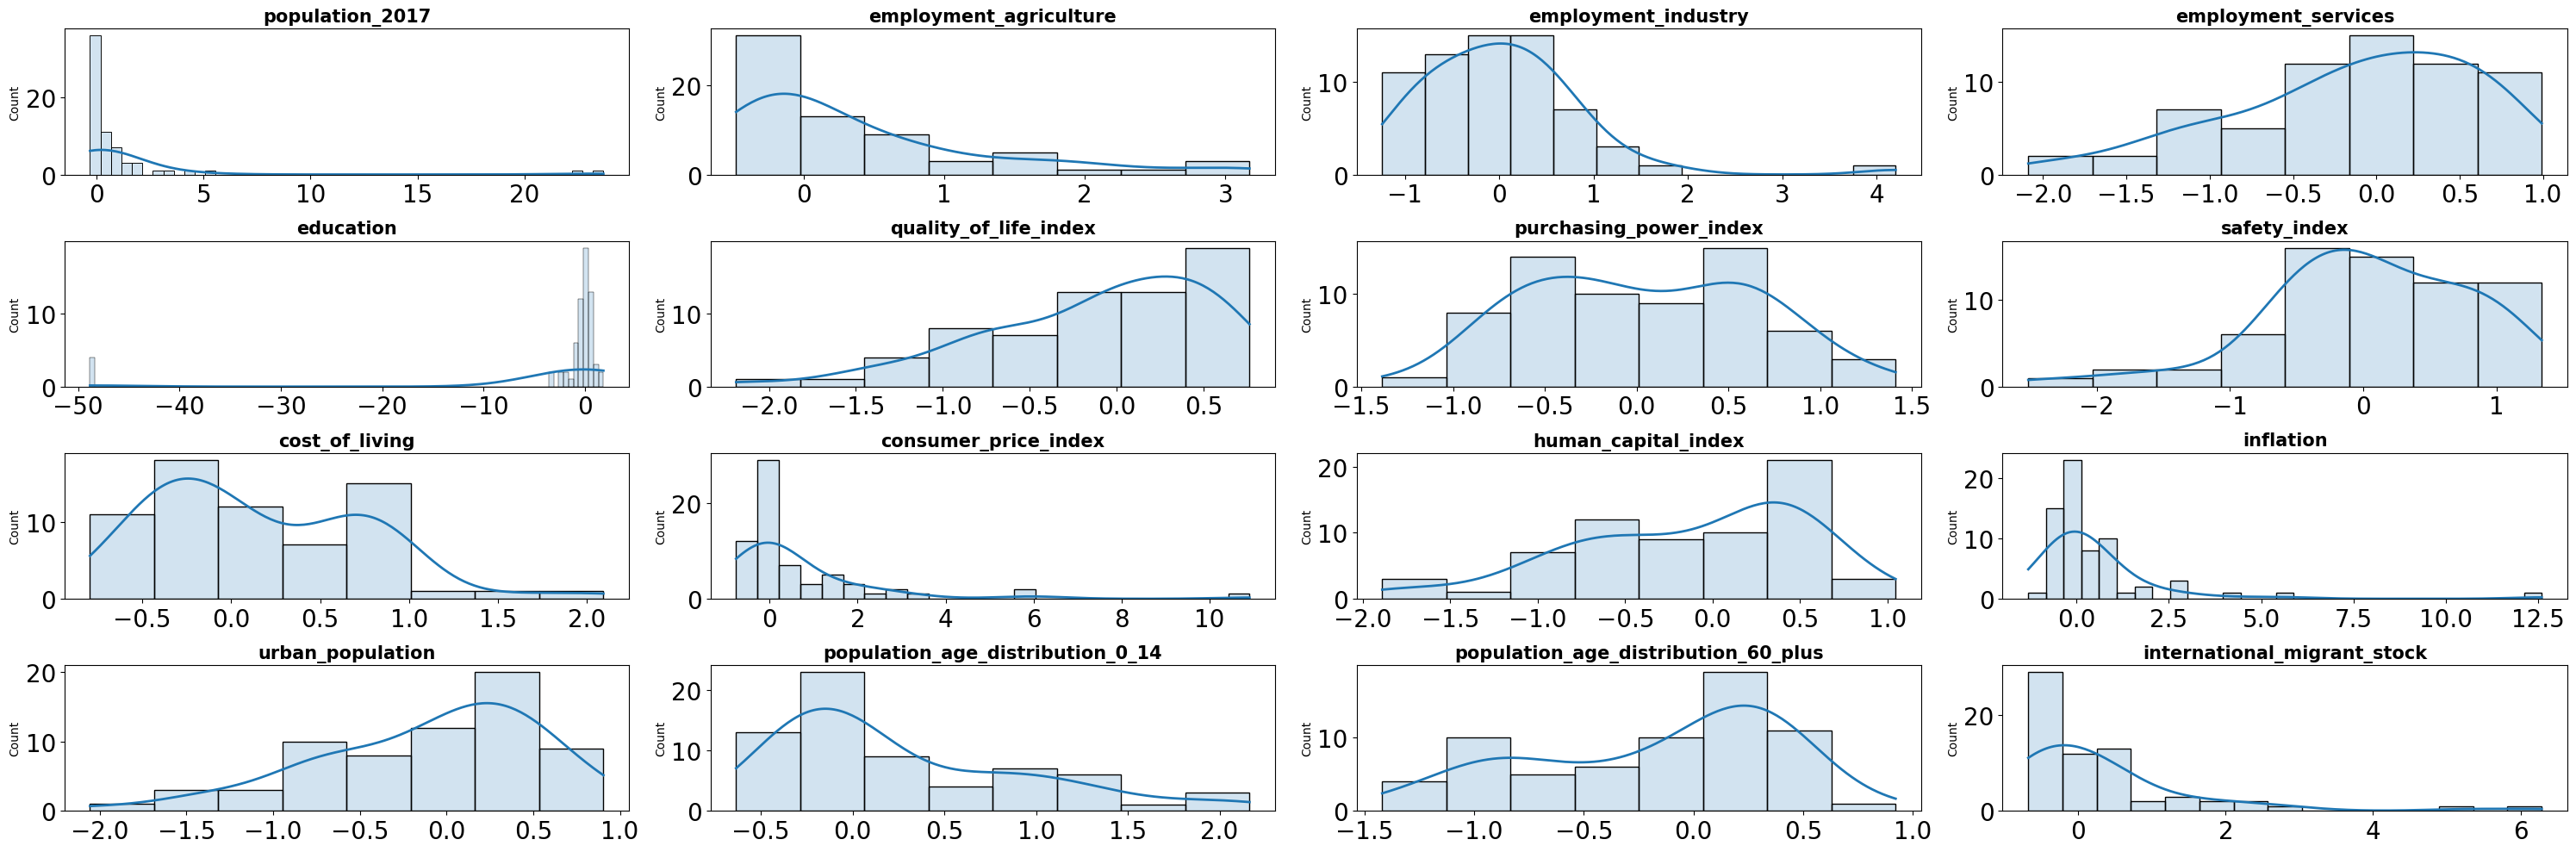

In [16]:
# comprobamos los histogramas después de la estandarización con los previos
fig, axes = plt.subplots(4,4 , figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat

for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [17]:
# sobreescribimos las columnas estandarizadas
df[numericas_robust.columns] = numericas_robust

In [18]:
df.head()

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal
country,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653
Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998
Austria,WesternEurope,66.94,-0.172512,-0.107660,0.243056,0.120516,0.352941,0.765464,0.530557,1.143569,0.629026,0.018589,0.507418,0.030085,-0.615413,-0.332362,0.294340,0.694280,4.581754
Belarus,EasternEurope,37.60,-0.160047,0.298137,1.131944,-0.527977,0.070588,-0.338766,-0.699621,0.976879,-0.461962,1.234337,-0.077916,1.839723,0.111590,-0.029155,0.007547,0.213018,3.906126
Belgium,WesternEurope,82.34,-0.126655,-0.397516,-0.368056,0.573888,0.870588,0.302134,0.434187,-0.255296,0.740210,-0.024568,0.293769,0.050562,0.830865,0.017493,0.256604,0.284024,4.828160


Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [19]:
df.to_csv('datos/soci_econ_country_profiles_estandarizado.csv')